In [1]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.estimator import estimator
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


sys.path.append('src/')

In [2]:
model_dir = '../CQ500_models/old_models/ResModel_EA_z64_lr0.0002'
simp_model_dir = '../CQ500_models/old_models'
data_dir = '../celebA_models/images.npy'

In [3]:
params = json.load(open(model_dir + '/params.txt','r'))
params['model_dir'] = simp_model_dir
params['data_dir']  = data_dir
params['dataset'] = 'CELEBA'
params['model'] = 'RESNET'
params['soft_label'] = 0.1
params['window_lambda'] = None
params['use_wgan'] = False
params['ignore_params_check'] = True
params['use_tpu'] = False

Import the model

In [4]:
if params['model'] == 'RESNET':
    from model import ResModel as Model
if params['dataset'] == 'CELEBA':
    from datamanager.celebA_input_functions import generate_input_fn

In [5]:
model = Model(model_dir=params['model_dir'], data_dir=params['data_dir'], dataset=params['dataset'],
                # Model parameters
                learning_rate=params['learning_rate'], batch_size=params['batch_size'], noise_dim=params['noise_dim'],
                noise_cov=params['noise_cov'], soft_label_strength=params['soft_label'],
                use_window_loss=params['use_window_loss'], lambda_window=params['window_lambda'],
                # WGAN
                use_wgan_penalty=params['use_wgan'], wgan_lambda=params['wgan_lambda'], wgan_n=params['wgan_n'],
                # Encoder
                use_encoder=params['use_encoder'], encoder=params['encoder'], e_loss_lambda=params['e_loss_lambda'],
                # Reconstriction ¯\_(ツ)_/¯
                reconstruction_loss=params['reconstruction_loss'], r_loss_lambda=params['r_loss_lambda'],
                # Optimizers
                g_optimizer=params['g_optimizer'], d_optimizer=params['d_optimizer'], e_optimizer=params['e_optimizer'],
                # Training and prediction settings
                iterations_per_loop=params['iterations_per_loop'], num_viz_images=params['num_viz_images'],
                # Evaluation settings
                eval_loss=params['eval_loss'], train_steps_per_eval=params['train_steps_per_eval'],
                num_eval_images=params['num_eval_images'],
                # TPU settings
                use_tpu=params['use_tpu'], tpu=params['tpu'], tpu_zone=params['tpu_zone'],
                gcp_project=params['gcp_project'], num_shards=params['num_shards'],
                ignore_params_check=params['ignore_params_check'])

Import data

In [6]:
data = np.load(data_dir)
# model.build_model()
current_step = estimator._load_global_step_from_checkpoint_dir(model_dir)   # pylint: disable=protected-access,line-too-long
print(current_step)

44000


In [7]:
ls model_dir


ls: cannot access 'model_dir': No such file or directory


In [8]:
# model.generate_images(generate_input_fn, current_step)

In [9]:
# for i in range(5):
#     plt.figure()
#     plt.imshow(data[i])
# data.shape

In [10]:
# enc = model.encode(images=data[0], batch_size=10, clean_encoder_est=False)

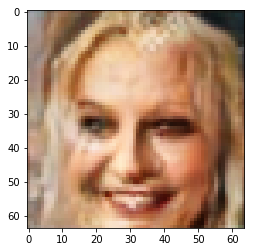

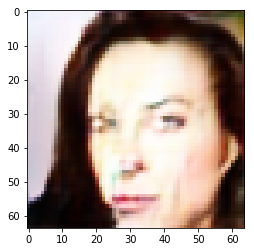

In [11]:
test1 = np.random.randn(100).astype(np.float32)
gen1 = model.generate(test1)[0]
plt.figure()
im = ((gen1 + 1)/2 *255).astype(np.uint8)
plt.imshow(im)
test2 = np.random.randn(100).astype(np.float32)
gen2 = model.generate(test2)[0]
plt.figure()
im = ((gen2 + 1)/2 *255).astype(np.uint8)
plt.imshow(im)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19


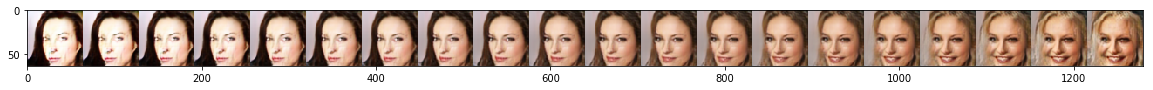

In [13]:
INCREMENTS = 20
lat_images1 = []
for i in range(INCREMENTS):
    print('iteration %s' % i)
    alph = i/INCREMENTS
    test = alph * test1 + (1-alph)*test2
    gen = model.generate(test)[0]
    lat_images1.append(gen)
plt.figure(figsize=(20,10))

img1 = np.concatenate(lat_images1, axis=1)
im = ((img1 + 1)/2 *255).astype(np.uint8)
plt.imshow(im)

sub 0 iteration 0
sub 0 iteration 1
sub 0 iteration 2
sub 0 iteration 3
sub 0 iteration 4
sub 0 iteration 5
sub 0 iteration 6
sub 0 iteration 7
sub 0 iteration 8
sub 0 iteration 9
sub 0 iteration 10
sub 0 iteration 11
sub 0 iteration 12
sub 0 iteration 13
sub 0 iteration 14
sub 0 iteration 15
sub 0 iteration 16
sub 0 iteration 17
sub 0 iteration 18
sub 0 iteration 19
sub 1 iteration 0
sub 1 iteration 1
sub 1 iteration 2
sub 1 iteration 3
sub 1 iteration 4
sub 1 iteration 5
sub 1 iteration 6
sub 1 iteration 7
sub 1 iteration 8
sub 1 iteration 9
sub 1 iteration 10
sub 1 iteration 11
sub 1 iteration 12
sub 1 iteration 13
sub 1 iteration 14
sub 1 iteration 15
sub 1 iteration 16
sub 1 iteration 17
sub 1 iteration 18
sub 1 iteration 19
sub 2 iteration 0
sub 2 iteration 1
sub 2 iteration 2
sub 2 iteration 3
sub 2 iteration 4
sub 2 iteration 5
sub 2 iteration 6
sub 2 iteration 7
sub 2 iteration 8
sub 2 iteration 9
sub 2 iteration 10
sub 2 iteration 11
sub 2 iteration 12
sub 2 iteration 13
sub 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


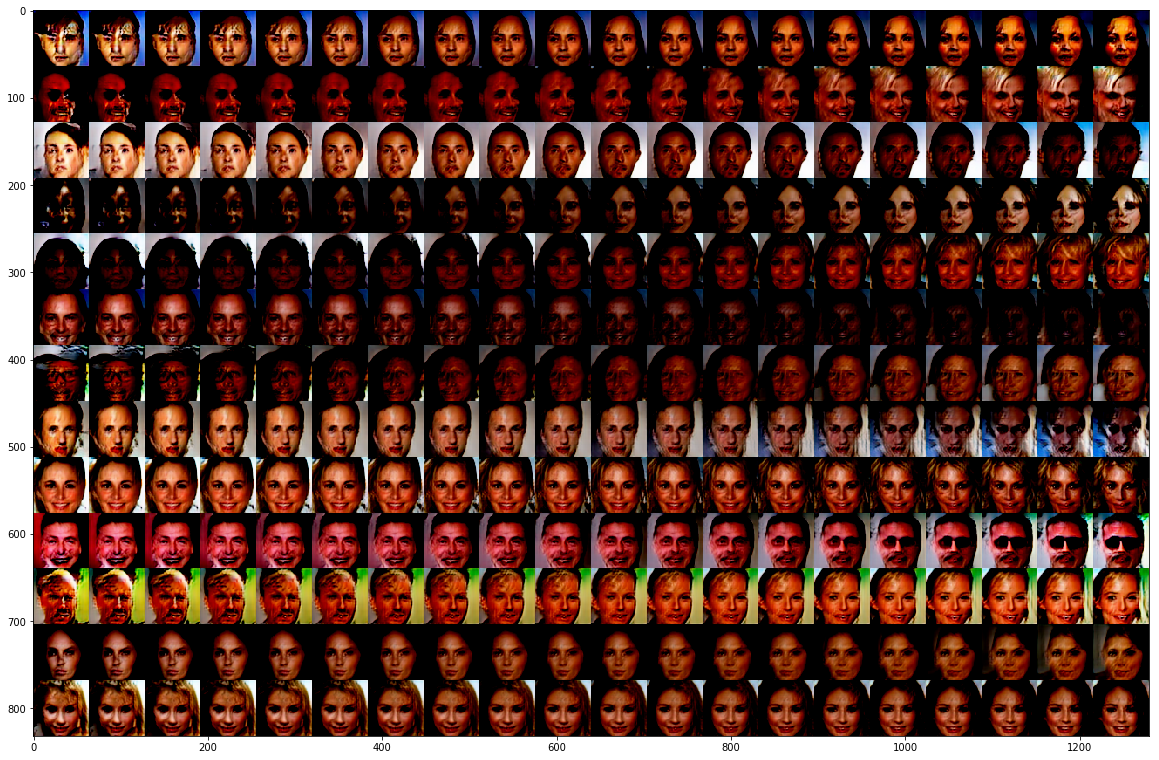

In [25]:
INCREMENTS = 20
SUBJS = 13
subjs = []
for k in range(SUBJS):

    interp_space1 = np.random.randn(100).astype(np.float32)
    g1 = model.generate(interp_space1)[0]
    im1 = ((g1 + 1)/2 *255).astype(np.uint8)
    interp_space2 = np.random.randn(100).astype(np.float32)
    g2 = model.generate(interp_space2)[0]
    im2 = ((g2 + 1)/2 *255).astype(np.uint8)

    lat_im = []
    for i in range(INCREMENTS):
        print('sub %s iteration %s' % (k, i), flush=True)
        alph = i/INCREMENTS
        interp_space = alph * interp_space1 + (1-alph)*interp_space2
        gen = model.generate(interp_space)[0]
        lat_im.append(gen)
    subjs.append(np.concatenate(lat_im, axis=1))
final = np.concatenate(subjs, axis=0)
im = ((final + 1)/2 *255).astype(np.uint8)
plt.figure(figsize=(20,15))
plt.imshow(final)

(640, 960, 3)

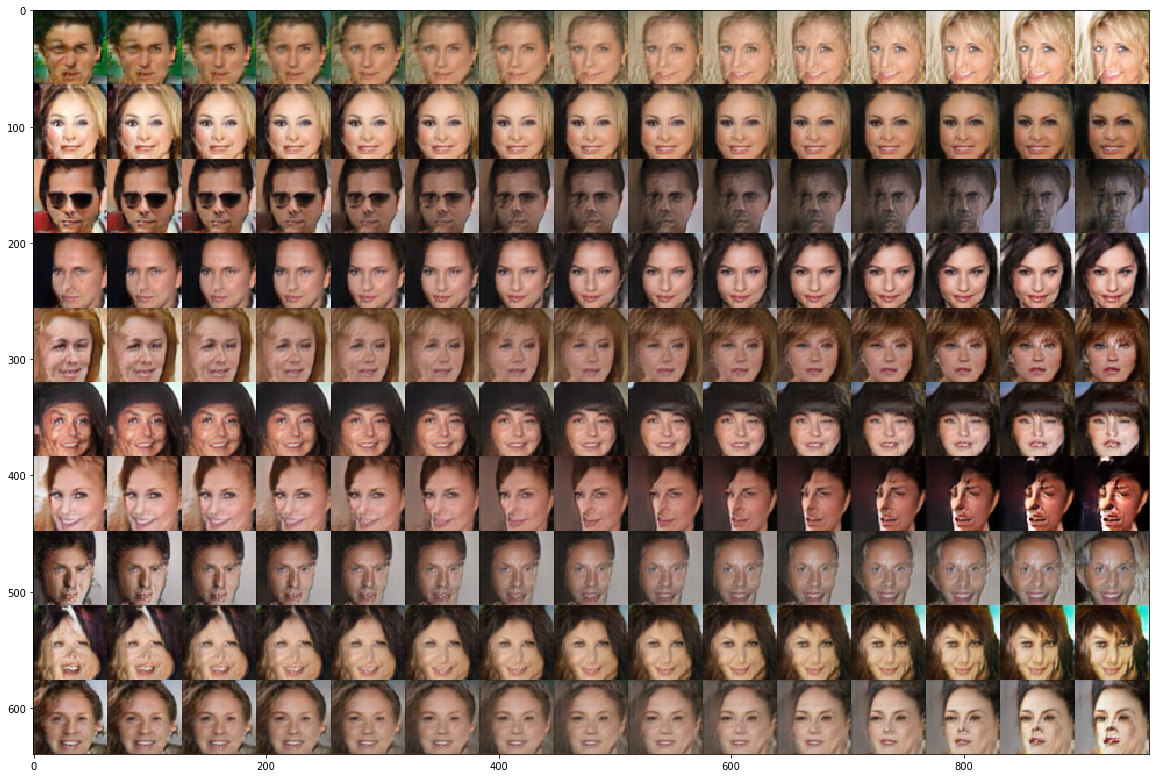

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(im)

iteration 0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running infer on CPU
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../celebA_models/bulk_17/ResModel/EaR/z100/AAA_lE0.5_lR0.5__lr0.0002/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:prediction_loop marked as finished
INFO:tensorflow:prediction_loop marked as finished
iteration 1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running infer on CPU
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../celebA_models/bulk_17/ResModel/EaR/z100/AAA_lE0.5_lR0.5__lr0.0002/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:prediction_loop marked as finished
INFO:tensorflow:prediction_loop marked as finished
iteration 2
INFO:tensorflow:Calling model_fn.
INFO:tenso

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:prediction_loop marked as finished
INFO:tensorflow:prediction_loop marked as finished
iteration 18
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running infer on CPU
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../celebA_models/bulk_17/ResModel/EaR/z100/AAA_lE0.5_lR0.5__lr0.0002/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:prediction_loop marked as finished
INFO:tensorflow:prediction_loop marked as finished
iteration 19
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running infer on CPU
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../celebA_models/bulk_17/ResModel/EaR/z100/AAA_lE0.5_lR0.5__lr0.0002/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow

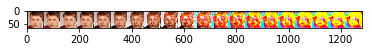

In [30]:
# enc[0]
INCREMENTS = 20
test = np.random.randn(100).astype(np.float32)
test[0] = -3
lat_images = []
for i in range(20):
    print('iteration %s' % i)
    test[0] += i/20 * 6
    gen = model.generate(test)
    lat_images.append(gen[0])

img = np.concatenate(lat_images, axis=1)
plt.figure()
im = ((img + 1)/2 *255).astype(np.uint8)
plt.imshow(im)

# model.generate_images(generate_input_fn, '0000')

In [29]:
len(lat_images[0])

1

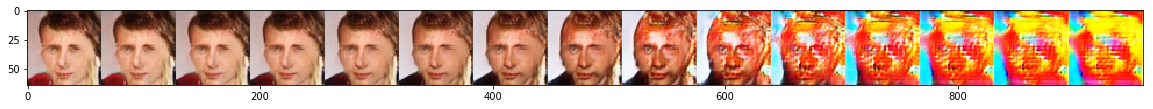

In [34]:
img = np.concatenate(lat_images[0:15], axis=1)
plt.figure(figsize=(20,10))
im = ((img + 1)/2 *255).astype(np.uint8)
plt.imshow(im)

In [23]:
for i in range(10):
    gen = model.generate(enc[i])
    plt.figure()
    im = ((gen[0] + 1)/2 *255).astype(np.uint8)
    plt.imshow(im)
gen[0].shape

NameError: name 'enc' is not defined

In [ ]:
(gen[0] + 1)/2 *255